# Quantum Image Representation of a binary Image

        Author:MD.Nazmuddoha Ansary  

> Familiarization with **Compression** and Application of a basic algorithm for **practical cases** (such as: **Machine Learning** data preprocessing) 
## BitString Compression
To store a bit string of length **n** in a classical computer we will need to use **n** bits. 
For the same purpose, in a quantum computer it is enough to use only **log2(n)+1** qubits.The way for that is to write down the bit string in the notation where firsts qubits describe the position (address) in a bit string, and the last one, the value on this position
### Example:
Modify the **BITS** list to see how it works

In [1]:
# any random binary string
BITS=[1,0,0,1,1,0,1]

In [2]:
import math
from termcolor import colored
import matplotlib.pyplot as plt
%matplotlib inline
QBITS=math.ceil(math.log2(len(BITS)))+1
# example prints
def getpAandBinVals(BITS,QBITS,verbose=True):
    REV_BITS=BITS[::-1]
    BSTRING="".join([str(bit) for bit in BITS])
    
    if verbose:
        print('For the Binary String:'+colored('{}'.format(BSTRING),'green')
              +' which has {} classical bits can be represented by: '.format(len(BSTRING))
              + colored(' {} '.format(QBITS),'blue') +' quantum bits')
        _cap=''.join(['A' for _ in range(QBITS-1)])
        _cap='        BS|'+_cap+'V'
        print()
        print(_cap)
        print(''.join(['-' for _ in range(2*len(_cap))]))
    BIN_VALS=[]
    
    for i in range(len(REV_BITS)):
        _bin_str='{}{}'.format(bin(i)[2:].zfill(QBITS-1),REV_BITS[i])
        if verbose:
            print('        {} |{}'.format(REV_BITS[i],_bin_str))
        
        BIN_VALS.append(int(_bin_str,2))
    if verbose:
        print()
        print('The binary string can be represented as:')
        print()
        print(colored('|bs> =','blue'),end=" ")
    for i in range(int(math.pow(2,QBITS))):
        _coeff='b'
        _color='red'
        if i in BIN_VALS:
            _coeff='a'
            _color='green'
        if _coeff=='b':
            _exmpl_state='|{}>'.format(bin(i)[2:].zfill(QBITS))

        if i < int(math.pow(2,QBITS))-1:
            _str='{}|{}> +'.format(_coeff,bin(i)[2:].zfill(QBITS))
            if verbose:
                print(colored(_str,_color),end=" ")
        else:
            _str='{}|{}>'.format(_coeff,bin(i)[2:].zfill(QBITS))
            if verbose:
                print(colored(_str,_color))
                print()
    pA=math.sqrt(1/len(BIN_VALS))
    if verbose:
        print('Here '+colored('a','green')+' and '+colored('b','red')+' are '+colored('probability amplitude','yellow'))
        print('where '+colored('b=0 ','red')+'for the states such as :'
              +colored('{}'.format(_exmpl_state),'red') 
              +' which do not occur.')
        print('The value of a will have to meet the normalization constraint:'
              + 'i.e-  '+colored('n*a^2=1 ==> a=sqrt(1/n)','green'))  
        print('where n is the time for occurance of a,since every state will have the same probability.')
        print('For our case: '+colored('a = {}'.format(pA),'green'))
    return pA,BIN_VALS

pA,BIN_VALS=getpAandBinVals(BITS,QBITS)

For the Binary String:1001101 which has 7 classical bits can be represented by:  4  quantum bits

        BS|AAAV
------------------------------
        1 |0001
        0 |0010
        1 |0101
        1 |0111
        0 |1000
        0 |1010
        1 |1101

The binary string can be represented as:

|bs> = b|0000> + a|0001> + a|0010> + b|0011> + b|0100> + a|0101> + b|0110> + a|0111> + a|1000> + b|1001> + a|1010> + b|1011> + b|1100> + a|1101> + b|1110> + b|1111>

Here a and b are probability amplitude
where b=0 for the states such as :|1111> which do not occur.
The value of a will have to meet the normalization constraint:i.e-  n*a^2=1 ==> a=sqrt(1/n)
where n is the time for occurance of a,since every state will have the same probability.
For our case: a = 0.3779644730092272


**NOTE**: In quantum mechanics, a **probability amplitude** is a complex number used in describing the behaviour of systems. The modulus squared of this quantity represents a probability or probability density.

### Encoder Circuit
**NOTE**: use ```.decompose()``` as per need to view basic gates

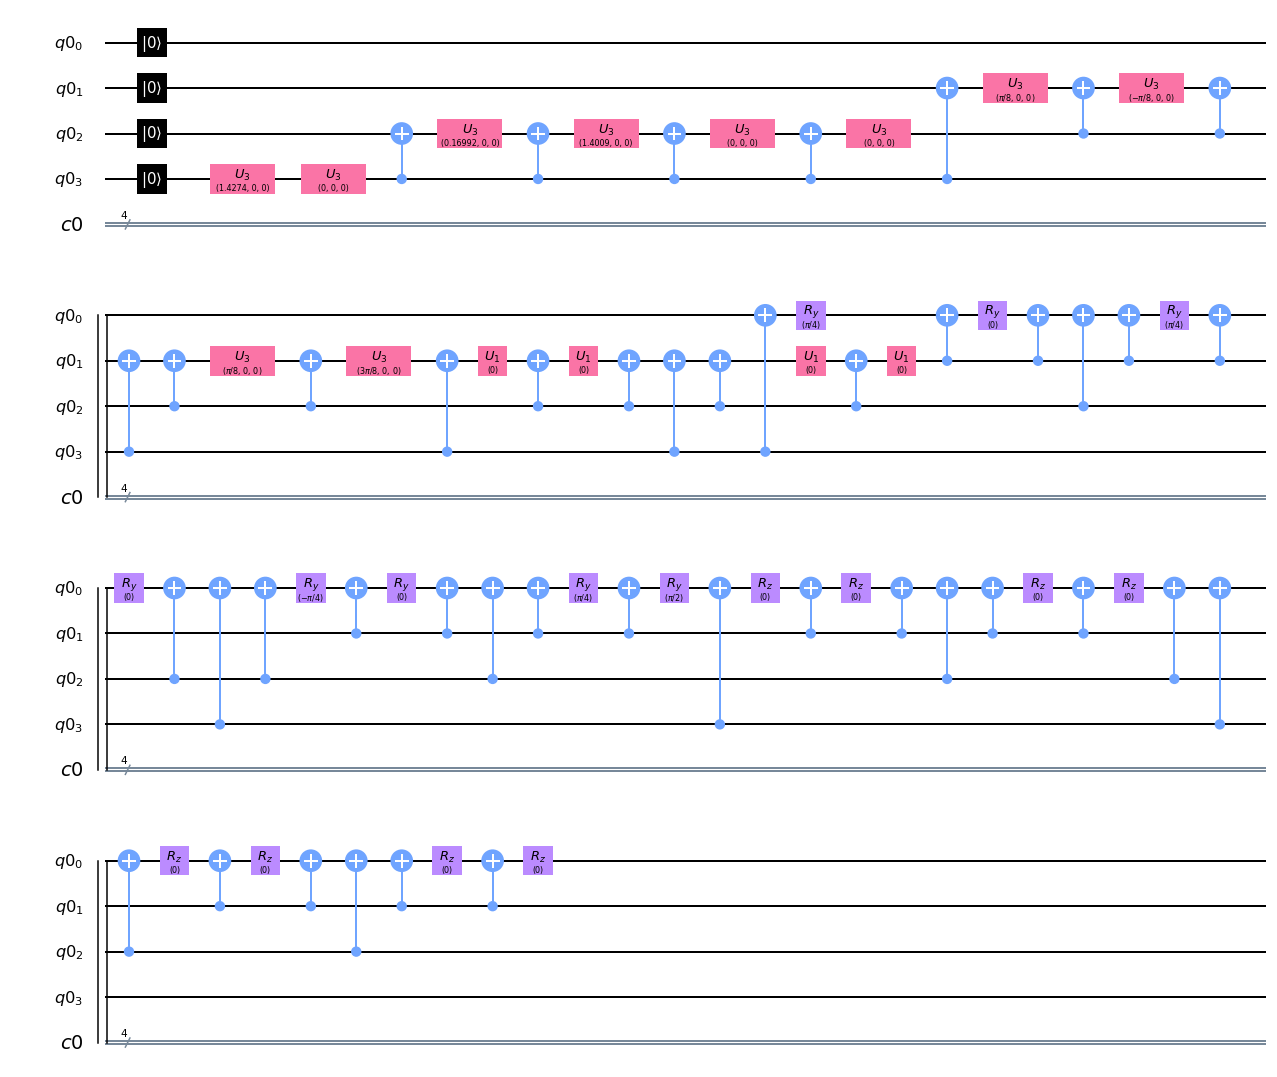

In [3]:
from qiskit import *


_instruction_list=[0.0 for _ in range(int(math.pow(2,QBITS)))]
for idx,_ in enumerate(_instruction_list):
    if idx in BIN_VALS:
        _instruction_list[idx]=pA
        
# circuit
qr = QuantumRegister(QBITS)
cr = ClassicalRegister(QBITS)
circuit = QuantumCircuit(qr, cr)
circuit.initialize(_instruction_list, qr)
# this is just to view the basic gates
circuit.decompose().decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

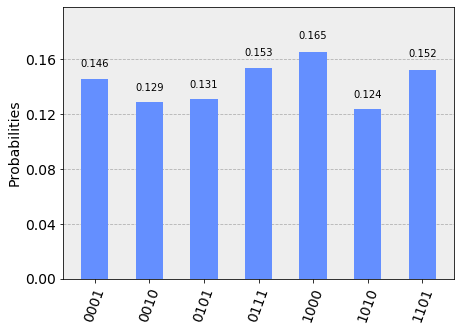

In [4]:
# Add measurements and execute
from qiskit import BasicAer as Aer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
circuit.measure(qr, cr)
result = execute(circuit,backend=backend).result()
counts = result.get_counts()
plot_histogram(counts)


## Understanding The Result

In [5]:
def countsToDecodedString(counts,QBITS):
    _res=[]
    print('States Received: ',end=" ")
    for key in counts.keys():
        print(colored('|{}>'.format(key),'green'),end=" ")
        _res.append(int(key,2))
    _res.sort()
    print()
    _res=[bin(_res[i])[2:].zfill(QBITS) for i in range(len(_res))]
    print()
    _cap=''.join(['A' for _ in range(QBITS-1)])
    _cap='        {}|v'.format(_cap)
    print(_cap)
    print(''.join(['-' for _ in range(2*len(_cap))]))
    string_v=[]
    for state in _res:
        v=state[-1]
        string_v.append(v)
        a=state[:-1]
        print('        {}|{}'.format(a,v))
    string_v=string_v[::-1]
    decoded=''.join([string_v[i] for i in range(len(string_v))])
    print()
    print('Decoded String:'+colored('{}'.format(decoded),'green'))
    
countsToDecodedString(counts,QBITS)

States Received:  |1000> |1010> |1101> |0101> |0111> |0010> |0001> 

        AAA|v
--------------------------
        000|1
        001|0
        010|1
        011|1
        100|0
        101|0
        110|1

Decoded String:1001101


## Running On a Real Q HardWare
**THIS IS WHERE IT GETS INTERESTING.**  
If we run the circuit **IDEALY** it should giveus back the exact string we put. But, due to **actual errors** in the **HARDWARE at IBM LAB** we will not get the exact result we are looking for. 
**NOTE THAT**: There is ```qiskit.ignis```  which can help us minimize the noise with various measurements but we will not use them and use the noisy output instead. These noises can generate from anything physical  like **Energy Relaxation** can cause faulty measurements.
*(Energy Relaxation roughly means decay of state with time: i.e- the longer you wait to take measurements the amount it deviates from ideal case)*

In [6]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
def getLeastBusyHardware():
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub = 'ibm-q')
    possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= (QBITS+1)
                                       and 
                                     x.configuration().simulator == False)
    qcomp = least_busy(possible_devices)
    print(qcomp)
    return qcomp

qcomp=getLeastBusyHardware()


ibmq_16_melbourne


In [7]:
import qiskit.tools.jupyter
%qiskit_job_watcher
# execute
job = execute(circuit, backend=qcomp,shots=1024)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [8]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


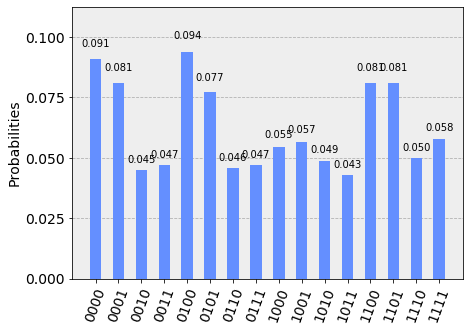

In [9]:
result = job.result()
counts=result.get_counts()
plot_histogram(counts)

In [10]:
countsToDecodedString(counts,QBITS)

States Received:  |1000> |0100> |0000> |1001> |1010> |0101> |1011> |0011> |1111> |0010> |1110> |1100> |0111> |1101> |0110> |0001> 

        AAA|v
--------------------------
        000|0
        000|1
        001|0
        001|1
        010|0
        010|1
        011|0
        011|1
        100|0
        100|1
        101|0
        101|1
        110|0
        110|1
        111|0
        111|1

Decoded String:1010101010101010


# QIR (Binary) TASK:
Now load a binary image and decode it back
**HINT**:
* use the ```preprocessImage``` Function. Add codes for turning your image to a proper binary.
* The normalization of amplitudes **WILL** return error if the preprocessing is done wrong
* **DONT Just Check the value** of preprocessed image ,**CHECK THE TYPE AS WELL**
* You Can Use: ```getpAandBinVals(BITS,QBITS,verbose=False)``` for a clean output (IF NOT OBVIOUS)

In [11]:
import os
import numpy as np
from PIL import Image


# FIXED PARAMS
IMAGE_DIM=16

# Determine The Number of QBITS NEEDED
QBITS=None
# Set an Image Path of your preference
IMG_PATH=os.path.join(os.getcwd(),'src_img','test.bmp')

def preprocessImage(img_path):
    img=Image.open(img_path).convert('L') # convert image to grayscale
    img=img.resize((IMAGE_DIM,IMAGE_DIM))
    x=np.array(img)
    # add binarization code as per need
    '''
    CODE TO BE ADDED FOR PRACTICE ... HAPPY Quantum Image Encoding
    '''
    x=np.reshape(x,(1,IMAGE_DIM*IMAGE_DIM))
    x=x[0]
    return x

